Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [2]:
import thinkstats2
live = preg[preg.outcome == 1]

cdf = thinkstats2.Cdf(live.totalwgt_lb)

Display the CDF.

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


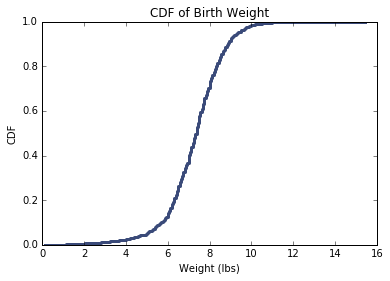

In [3]:
import thinkplot
thinkplot.Cdf(cdf)
thinkplot.Config(
    title='CDF of Birth Weight',
    xlabel='Weight (lbs)',
    ylabel='CDF'
)

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [5]:
my_weight = 7.5
cdf.PercentileRank(my_weight) / 100

0.57756140739101569

It looks like my birth weight (7.5 lbs), was a bit higher than average.

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [8]:
other_cdf = thinkstats2.Cdf(live[live.birthord != 1].totalwgt_lb)

Compute the percentile rank of your birthweight

In [9]:
other_cdf.PercentileRank(my_weight) / 100

0.55871657754010695

Even among non-first-borns, I was still slightly above the median.

Compute the median birth weight by looking up the value associated with p=0.5.

In [11]:
other_cdf.Percentile(50)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [12]:
other_cdf.Percentile(75) - other_cdf.Percentile(25)

1.6875

Neat, but what does this actually mean?

Make a random selection from <tt>cdf</tt>.

In [14]:
cdf.Random()

8.1875

Draw a random sample from <tt>cdf</tt>.

In [15]:
cdf.Sample(10)

array([  5.5625,   8.25  ,  11.9375,   7.375 ,   8.9375,   2.125 ,
         7.875 ,   9.    ,   6.6875,   7.6875])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

{'xscale': 'linear', 'yscale': 'linear'}

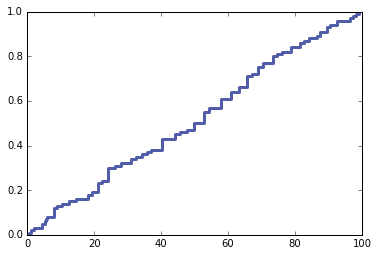

In [16]:
samples = cdf.Sample(100)
ranks = [cdf.PercentileRank(s) for s in samples]
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

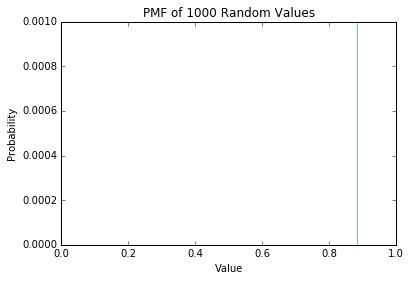

In [27]:
import random
rand_values = [random.random() for i in range(1000)]
rand_pmf = thinkstats2.Pmf(rand_values)
thinkplot.Hist(rand_pmf)
thinkplot.Config(
    title='PMF of 1000 Random Values',
    xlabel='Value',
    ylabel='Probability'
)

The probability of any single value is extremely small, so you can't really see anything on the PMF plot.

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

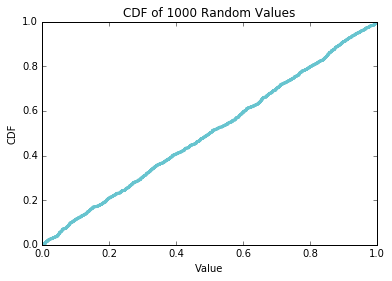

In [28]:
rand_cdf = thinkstats2.Cdf(rand_values)
thinkplot.Cdf(rand_cdf)
thinkplot.Config(
    title='CDF of 1000 Random Values',
    xlabel='Value',
    ylabel='CDF'
)

As expected, the CDF plot is basically a line.

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

What does the interquartile range actually mean?  Is it comparable to the standard deviation?

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.